In [7]:
from glob import glob
import os
import glob
import re
file_dir = '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train'

#/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/sleeping_2/image_01/0000000017.png 
#/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/sleeping_2/proj_depth/groundtruth/image_01/0000000017.png 0

# def getFlist(path):
#     for root, dirs, files in os.walk(file_dir):
#         print('root_dir:', root)  
#         print('sub_dirs:', dirs)  
#         print('files:', files)     
#     return files
# file_name = getFlist(file_dir)

#移除sleeping_1, shaman_3, ambush_7 三个文件夹
dir_list = []
dir_list = glob.glob(file_dir + '/*')
dirList = []
for i in range(len(dir_list)):
    dirList.append(dir_list[i].split('/')[7])


dirList.remove('shaman_3')

dirList.remove('ambush_7')
dirList.remove('sleeping_1')

f = []
f1 = []
for i in range(len(dirList)):
    #正常情况
#     f = glob.glob(file_dir + '/*/image_01/*')
#     f1 = glob.glob(file_dir + '/*/proj_depth/groundtruth/image_01/*')

    f_list = glob.glob(file_dir + '/'+ dirList[i] + '/image_01/*')
    f.extend(f_list)
    f1_list = glob.glob(file_dir + '/'+ dirList[i] +'/proj_depth/groundtruth/image_01/*')
    f1.extend(f1_list)
    
list = []
for i in range(len(f)):
#     matchObj = re.match( '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/(.*)/(.*)/00000000(.*).png', f[i], re.M|re.I)
#     list.append(f[i] +" "+ file_dir + "/" + matchObj.group(1) +'/proj_depth/groundtruth/image_01/frame_00' + matchObj.group(3) + ".dpt" + " 0")
    
    list.append(f[i].split('/')[7]+ "/" + f[i].split('/')[8] + "/" + f[i].split('/')[9] + " " 
                + f1[i].split('/')[7] + "/" + f1[i].split('/')[8]+ "/" + f1[i].split('/')[9] + "/" + f1[i].split('/')[10] + "/" + f1[i].split('/')[11]
                + " 0" )

#------------------------------------------------------------------------------------------------------------------------------new
validate_dirList = ['shaman_3', 'sleeping_1', 'ambush_7']
f2 = []
f3 = []
for i in range(len(validate_dirList)):
    #正常情况
#     f = glob.glob(file_dir + '/*/image_01/*')
#     f1 = glob.glob(file_dir + '/*/proj_depth/groundtruth/image_01/*')

    f2_list = glob.glob(file_dir + '/'+ validate_dirList[i] + '/image_01/*')
    f2.extend(f2_list)
    f3_list = glob.glob(file_dir + '/'+ validate_dirList[i] +'/proj_depth/groundtruth/image_01/*')
    f3.extend(f3_list)
    
list_validate = []



for i in range(len(f2)):
#     matchObj = re.match( '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/(.*)/(.*)/00000000(.*).png', f[i], re.M|re.I)
#     list.append(f[i] +" "+ file_dir + "/" + matchObj.group(1) +'/proj_depth/groundtruth/image_01/frame_00' + matchObj.group(3) + ".dpt" + " 0")
    
    list_validate.append(f2[i].split('/')[7]+ "/" + f2[i].split('/')[8] + "/" + f2[i].split('/')[9] + " " 
                + f3[i].split('/')[7]+ "/"+ f3[i].split('/')[8]+ "/" + f3[i].split('/')[9] + "/" + f3[i].split('/')[10] + "/" + f3[i].split('/')[11]
                + " 0" )


file = open("sintel_eval_2.txt", "w")
for i in range(len(list_validate)):
    file.write(list_validate[i] + "\n")

#-------------------------------------------------------------------------------------------------------------------------------
# file2 = open("mpi_sintel_train.txt", "w")
# for i in range(len(list)):
#     file2.write(list[i] + "\n")
# file2.close()
# matchObj = re.match( '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/(.*)/(.*)/00000000(.*).png', f[0], re.M|re.I)
# print(file_dir + "/" + matchObj.group(1) +'/proj_depth/groundtruth/image_01_dpt/frame_00' + matchObj.group(3) + ".dpt")



In [16]:
import re
matchObj = re.match( '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/(.*)/(.*)/00000000(.*).png', f[0], re.M|re.I)
matchObj.group(1)
print(matchObj.group(1))

ambush_2


In [8]:
import random
 
 
def data_split(full_list, ratio, shuffle=False):
    """
    数据集拆分: 将列表full_list按比例ratio（随机）划分为2个子列表sublist_1与sublist_2
    :param full_list: 数据列表
    :param ratio:     子列表1
    :param shuffle:   子列表2
    :return:
    """
    n_total = len(full_list)
    offset = int(n_total * ratio)
    if n_total == 0 or offset < 1:
        return [], full_list
    if shuffle:
        random.shuffle(full_list)
    sublist_1 = full_list[:offset]
    sublist_2 = full_list[offset:]
    return sublist_1, sublist_2
 
sub_data1, sub_data2 = data_split(list, ratio=0.9, shuffle=True)

# file = open("sintel_eval_2.txt", "w")
# for i in range(len(sub_data2)):
#     file.write(sub_data2[i] + "\n")
# file.close()
#-----------------------------------
for i in range(len(sub_data2)):
    file.write(sub_data2[i] + "\n")
file.close()
#------------------------------------
print("is everything ok?")
file2 = open("sintel_train_all.txt", "w")
for i in range(len(sub_data1)):
    file2.write(sub_data1[i] + "\n")
file2.close()
print('ok')

is everything ok?
ok


[[4.301961  4.3137255 4.32549   ... 2.4156864 2.4156864 2.4156864]
 [4.3058825 4.317647  4.32549   ... 2.4235294 2.4235294 2.4235294]
 [4.3058825 4.317647  4.329412  ... 2.4313726 2.4313726 2.4313726]
 ...
 [0.9764706 0.9764706 0.9764706 ... 1.3254902 1.3254902 1.3254902]
 [0.9764706 0.9764706 0.9764706 ... 1.3254902 1.3254902 1.3254902]
 [0.9764706 0.9764706 0.9764706 ... 1.3254902 1.3254902 1.3215686]]
[[4.2885675  4.2994914  4.3104715  ... 2.4097912  2.4089475  2.4081044 ]
 [4.2900953  4.3010273  4.312015   ... 2.4168427  2.4159942  2.4151459 ]
 [4.2916245  4.302564   4.31356    ... 2.4239357  2.423082   2.4222288 ]
 ...
 [0.9727996  0.9742409  0.9756865  ... 1.3231939  1.322131   1.32107   ]
 [0.9727376  0.9741788  0.9756242  ... 1.3226074  1.3215457  1.3204854 ]
 [0.97267574 0.9741166  0.9755618  ... 1.3220216  1.3209608  1.3199013 ]]


Text(0.5, 1.0, 'depth')

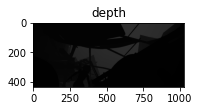

In [7]:
from PIL import Image
import sintel_io
from matplotlib import pyplot as plt
import numpy as np

depth_path = '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/market_6/proj_depth/groundtruth/image_01_dpt/frame_0040.dpt'  
image_path = '/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/market_6/proj_depth/groundtruth/image_01/0000000040.png'


image = Image.open(image_path)
image = np.asarray(image, dtype=np.float32) / 255.0
print(image)

# height = image.height
# width = image.width
# top_margin = int(height - 352)
# left_margin = int((width - 1000) / 2)
# depth_gt = depth_gt.crop((left_margin, top_margin, left_margin + 1000, top_margin + 352))
# image = image.crop((left_margin, top_margin, left_margin + 1000, top_margin + 352))

# plt.subplot(323)
# plt.imshow(depth_gt,cmap='gray')
# plt.title('depth')

deptp_gt_np = sintel_io.depth_read(depth_path)

# depth_gt = np.expand_dims(depth_gt, axis=2)
# depth_gt = depth_gt / 256.0
print(deptp_gt_np)

# depth_gt = Image.fromarray(sintel_io.depth_read(depth_path))
# depth_gt = np.asarray(depth_gt, dtype=np.float32)
# print(depth_gt)

In [122]:
file_dir = '/data1/dataset/mpi_sintel_test/test'

f = glob.glob(file_dir + '/clean/*/*')
file_test = open("foo_test.txt", "w")
for i in range(len(f)):
    file_test.write(f[i] + " None " + "1" + '\n')


f = glob.glob(file_dir + '/final/*/*')

for i in range(len(f)):
    file_test.write(f[i] + " None " + "1" + '\n')
file_test.close()

100%|██████████| 1064/1064 [00:10<00:00, 99.94it/s] 


475037696


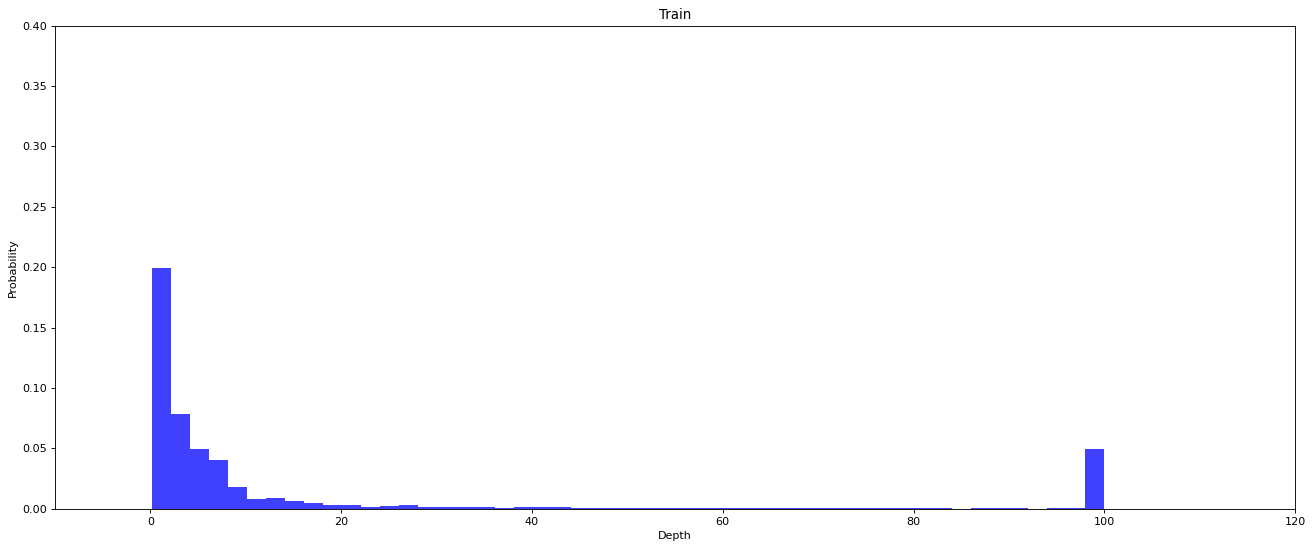

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
from PIL import Image
from glob import glob
import os
import glob
import numpy as np
from tqdm import tqdm
depth_path_list = glob.glob('/data1/dataset/rvc2022/depth/datasets_mpi_sintel/train/*/proj_depth/groundtruth/image_01/*.png')
# depth_path_list = glob.glob('/ssd/zrj/Monocular-Depth-Estimation-Toolbox/results/rvc_new_depth/*.png')
a = []

for path in tqdm(depth_path_list):
    image = Image.open(path)
    image = np.asarray(image, dtype=np.float32) / 256.0

    # temp = [image.min(), image.max()]
    a.extend(image)

#     a = np.array([a, image])

a = np.array(a)
a = a.flatten()
print(len(a))

# print(max(a)-min(a))
# d = 10
# num_bins = (max(a)-min(a))//d
# plt.figure(figsize=(20,8),dpi=80)
# plt.hist(a,100,density=True)
# plt.xticks(range(min(a),max(a)+d,d))

# plt.grid(alpha=0.4)
# plt.show()

plt.figure(figsize=(20,8),dpi=80)
n, bins, patches = plt.hist(a, 50, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Depth')

plt.ylabel('Probability')

plt.title('Train')

# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

plt.axis([-10, 120, 0, 0.4])

plt.grid(False)

plt.show()

In [1]:
import numpy as np
from PIL import Image

ar = np.ones((32, 32), dtype=np.uint16)
im = Image.fromarray(ar)
im.save('foo.png')

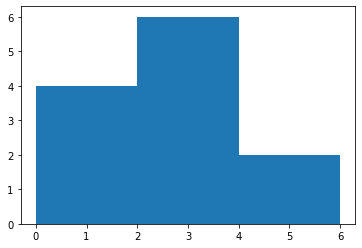

In [2]:
from matplotlib import pyplot as plt
values=[0,0.6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6]
plt.histplot(values,bins=6)

plt.show()

In [2]:
# seaborn test
from os import stat
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
 
sns.set(palette="muted", color_codes=True)  
sns.set_style("white")
sns.despine(top=True, right=True, left=False, bottom=True)
rs = np.random.RandomState(10) 

d = rs.normal(size=100) 

# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)  
 
# plt.title('seaborn: statistical data visualization')
sns.histplot(a, norm_hist=True, kde=False,  color="r")  

# plt.savefig('./a.png')
plt.show()  

# plt.bar(d,d, facecolor = 'slategray', edgecolor = 'white')
# plt.bar(d,-d, facecolor = 'lightpink', edgecolor = 'white')




NameError: name 'a' is not defined

<Figure size 432x288 with 0 Axes>

100%|██████████| 50/50 [00:00<00:00, 714.61it/s]
/ssd/ll/anaconda3/envs/adabins/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3200


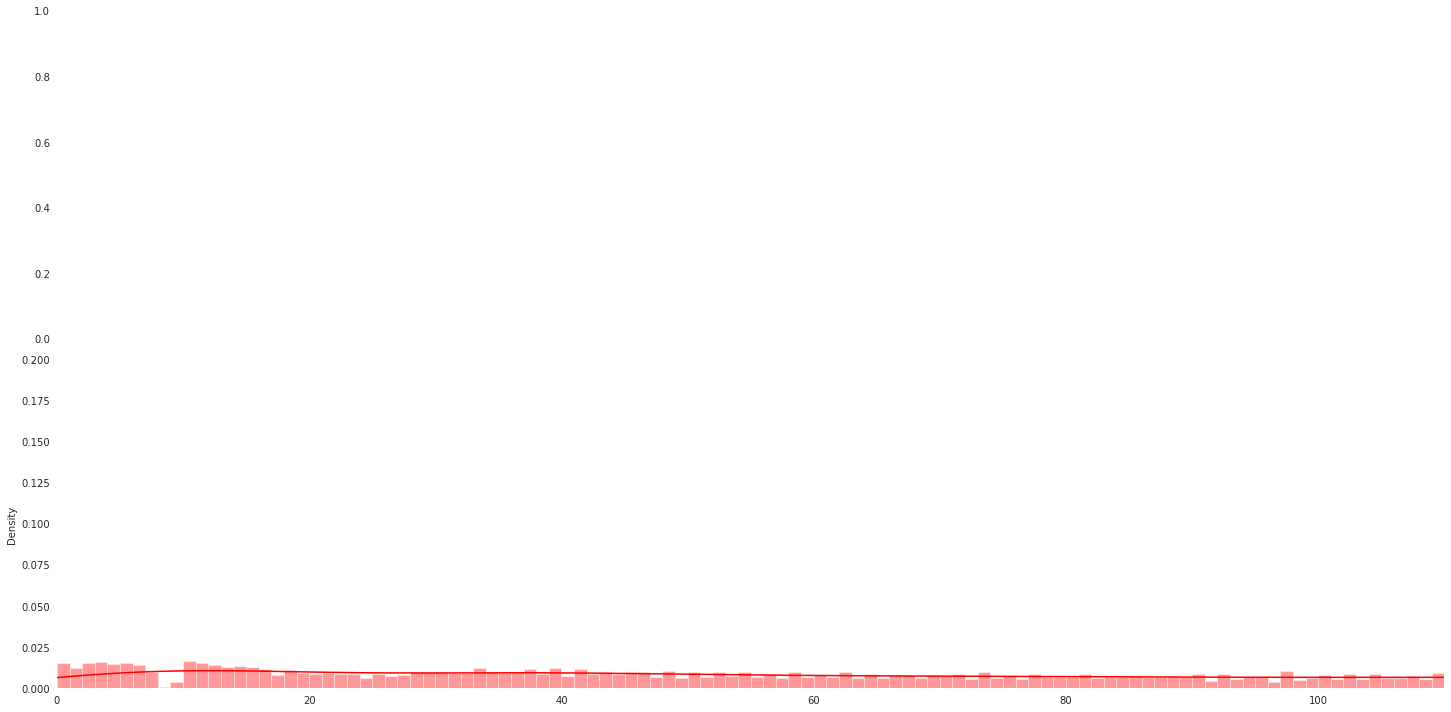

In [29]:
# bins range
#/ssd/ll/Monocular-Depth-Estimation-Toolbox-ll/bins/*.npy
from matplotlib import pyplot as plt
from matplotlib import font_manager
from PIL import Image
from glob import glob
import os
import glob
import numpy as np
from tqdm import tqdm
import seaborn as sns

path =  '/ssd/ll/Monocular-Depth-Estimation-Toolbox-ll/data/rabbitai/gt_depth/train/proj_depth/groundtruth/image_01/0000000009.png'

depth_gt =  Image.open(path)
depth_gt = np.asarray(depth_gt, dtype=np.float32) / 256.0
depth_gt = depth_gt.flatten()

depth_path_list = glob.glob('/ssd/ll/Monocular-Depth-Estimation-Toolbox-ll/results/rabbitai_mix5_new_npy/*.npy')
bins = []

for path in tqdm(depth_path_list):
    bin = np.load(path)
    bin = bin.flatten()
    bins.extend(bin[1:])
    

print(len(bins))

# plt.axis([-5, 300, 0, 0.2])

sns.set_style("white")
f, axes = plt.subplots(2, figsize=(20, 10), sharex=True)  
f.tight_layout()
# axes[0].barh(0, bins, align='center', color="red", zorder=10)

# axes[1].barh(1, bins, align='center', color="red", zorder=10)

 
# plt.title('seaborn: statistical data visualization')
# sns.distplot(bins, norm_hist=True,  kde=False,  color="r")  
plt.axis([0, 110, 0, 0.2])
sns.despine(top=True, right=True, left=True, bottom=True)
bins_=range(0,120,1)
# sns.distplot(depth_gt, bins_,  color="b",kde=False, norm_hist=True, ax = axes[0])  
sns.distplot(bins,bins_,  color="r",kde=True, norm_hist=True, ax = axes[1])  

# plt.savefig('./a.png')
plt.show() 





/ssd/ll/anaconda3/envs/adabins/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/ssd/ll/anaconda3/envs/adabins/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/ssd/ll/anaconda3/envs/adabins/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:>

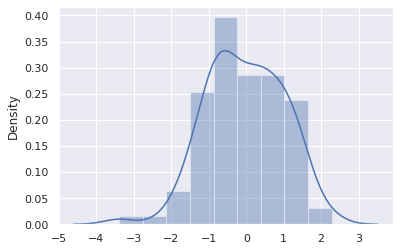

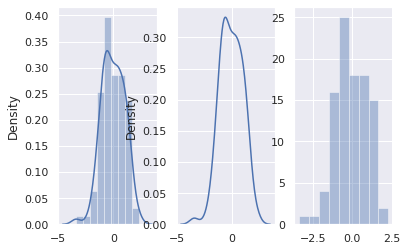

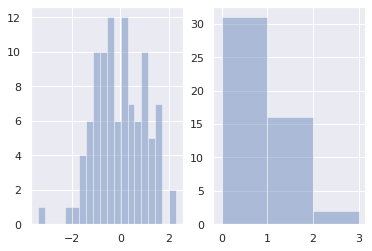

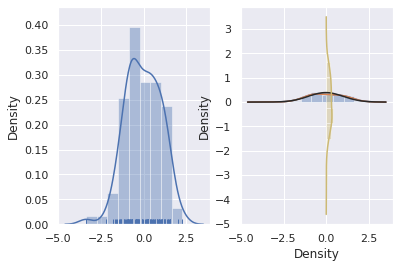

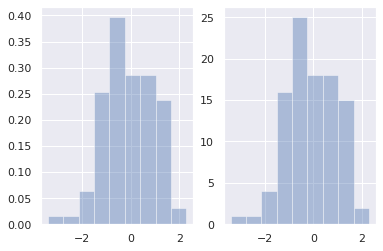

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  #切换到sns的默认运行配置

x=np.random.randn(100)
sns.distplot(x)


fig,axes=plt.subplots(1,3)  #创建一个1行三列的图片
sns.distplot(x,ax=axes[0])
sns.distplot(x,hist=False,ax=axes[1])  #不显示直方图
sns.distplot(x,kde=False,ax=axes[2])  #不显示核密度


#bins
fig,axes=plt.subplots(1,2)
sns.distplot(x,kde=False,bins=20,ax=axes[0]) #分成20个区间
sns.distplot(x,kde=False,bins=[x for x in range(4)],ax=axes[1]) #以0,1,2,3为分割点，形成区间[0,1],[1,2],[2,3]，区间外的值不计入。


#rag
fig,axes=plt.subplots(1,2)
sns.distplot(x,rug=True,ax=axes[0]) #左图
sns.distplot(x,ax=axes[1]) #右图


#fit
from scipy.stats import *
sns.distplot(x,hist=False,fit=norm) #拟合标准正态分布


#
sns.distplot(x,kde_kws={"label":"KDE"},vertical=True,color="y")

#norm_hist
fig,axes=plt.subplots(1,2)
sns.distplot(x,norm_hist=True,kde=False,ax=axes[0]) #左图
sns.distplot(x,kde=False,ax=axes[1]) #右图

In [5]:
import numpy as np

import matplotlib.pyplot as plt

from pylab import *

import seaborn as sns

def Drawhistogram(x,y):

    font = {'family': 'Times New Roman','size': 16,}

    sns.set(font_scale=1.2)

    plt.rc('font',family='Times New Roman')

    x = x

    y = y

    plt.figure(figsize=(12,8))

    plt.barh(range(len(y)), -x,color='darkorange',label='FPG-TNG')

    plt.barh(range(len(x)), y,color='limegreen',label='TPG-FNG')

    plt.xlim((-10,10))

    plt.xticks((-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8),

    ('inf','7','6','5','4','3','2','1','0','1','2','3','4','5','6','7','inf'),

    font={'size': 18})

    plt.yticks((0, 1, 2, 3, 4, 5, 6, 7, 8),

    ('Age','CCP','MCV','AKA','RF','CRP','A/O','Cr','IgE'),

    font={'size': 18})

    plt.xlabel('RAic',fontdict={'size': 18})

    plt.title("Root cause analysis of cost sensitive neural network model",

    font={'size': 18})

    plt.legend(fontsize=16)

    plt.show()
if __name__=="__main__":

    # Drawhistogram(np.array([1.713,5.400,1.800,8,1.137,2.400,1.620,0.000,2.700]),

    # np.array([0.954,3.690,1.071,8,1.607,0.992,0.714,8,0.714]))
    Drawhistogram(np.array(bins), np.array(bins))

